In [46]:
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.core import Spin
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure
import numpy as np
import matplotlib.pyplot as plt

### Télécharger la structure de bande du matériau attribué: NaRhO2

In [47]:
with MPRester("hrVQX4GT6umOK2yC") as m:
    # band structure for material id mp-8830
    bandstruct = m.get_bandstructure_by_material_id("mp-8830")

### Déterminer la bande interdite

In [48]:
#print(bandstruct.get_band_gap())
if (bandstruct.get_band_gap()['direct'] == True) : 
    print("La bande interdite est directe.")
if (bandstruct.get_band_gap()['direct']==False):
    print("La bande interdite est indirecte.")
lala=bandstruct.get_band_gap()['energy']
print("La valeur du gap énergétique est de : {} eV.".format(bandstruct.get_band_gap()['energy']))
print("Le matériau est donc un isolant.")
print("La transition a lieu en {}".format(bandstruct.get_band_gap()['transition']))

La bande interdite est indirecte.
La valeur du gap énergétique est de : 1.3799000000000001 eV.
Le matériau est donc un isolant.
La transition a lieu en (0.550,0.550,0.401)-(0.592,0.592,0.315)


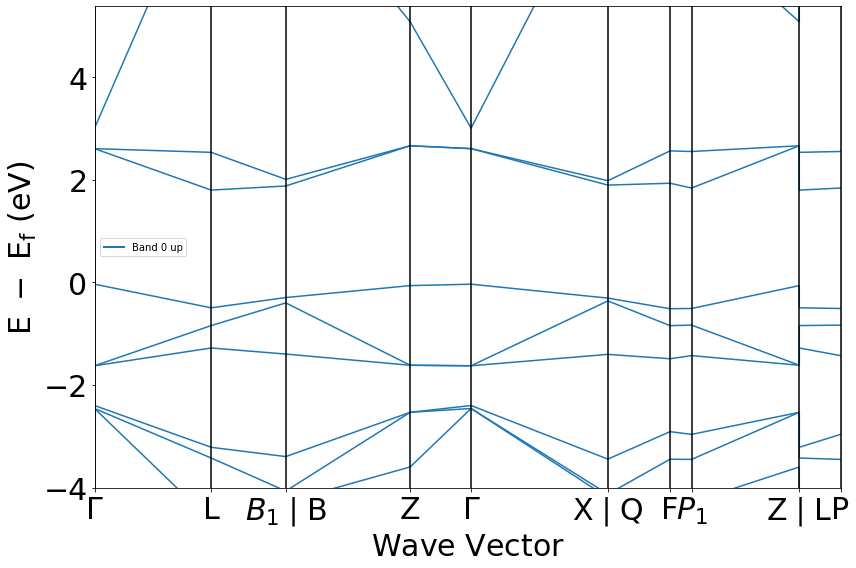

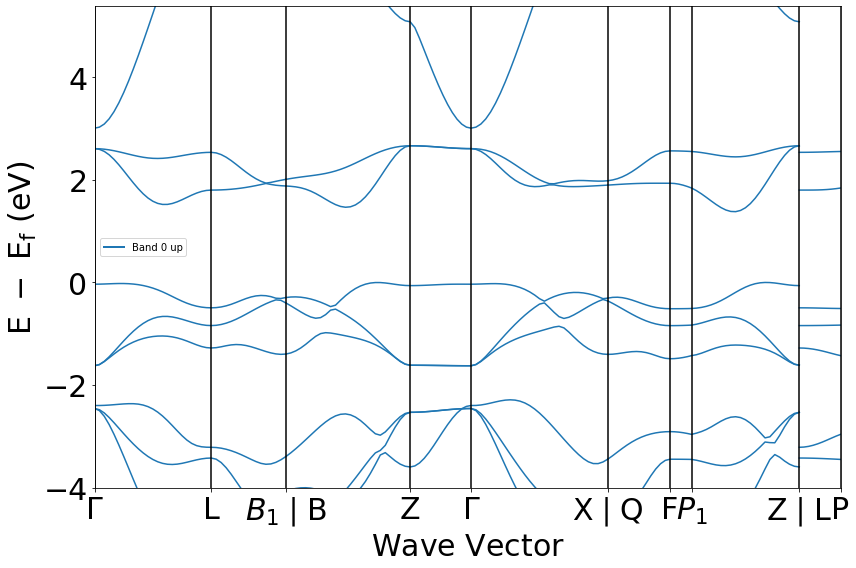

In [62]:
plot1 = BSPlotter(bandstruct)
plot1.get_plot(smooth = True,smooth_np = 2)
plot1.show()

### Trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion 

In [80]:
data = plot1.bs_plot_data()

    
val_delta = []
for i in range (len(data['energy'][str(Spin.up)])):
    val_delta.append(data['energy'][str(Spin.up)][i][10][-1]-data['energy'][str(Spin.up)][i][10][0])

#print(val_delta)
    
val_disp = []
for i in range(len(data['distances'])):
    val_disp.append(abs(deltas_énergie_valence[i]/écarts[i]))

maxval_disp=max(val_disp)
minval_disp=min(val_disp)

#print(val_disp)
#print(maxval_disp)
#print(minval_disp)

cond_delta = []
for i in range (len(data['energy'][str(Spin.up)])):
    cond_delta.append(data['energy'][str(Spin.up)][i][11][-1]-data['energy'][str(Spin.up)][i][11][0])
    
#print(val_delta)
    
cond_disp = []
for i in range(len(data['distances'])):
    cond_disp.append(abs(deltas_énergie_conduction[i]/écarts[i]))

maxcond_disp=max(cond_disp)
mincond_disp=min(cond_disp)

#print(cond_disp)
#print(maxcond_disp)
#print(mincond_disp)
    
dist = []
for i in range(len(data['distances'])):
    dist.append(data['distances'][i][-1]-data['distances'][i][0])

#print(dist)

#### Dispersion maximale

In [81]:
print("La pente maximale dans la bande de valence vaut", maxval_disp," dans la",dispersions_valence.index(maxval_disp)+1,"ère direction (\u0393 - L)")
print("La pente maximale dans la bande de conduction vaut", maxcond_disp, "dans la",dispersions_conduction.index(maxcond_disp)+1,"ère direction (\u0393 - L) ")

La pente maximale dans la bande de valence vaut 1.0607779382751685  dans la 1 ère direction (Γ - L)
La pente maximale dans la bande de conduction vaut 1.8870518103385567 dans la 1 ère direction (Γ - L) 


#### Dispersion maximale

In [82]:
print("La pente minimale dans la bande de valence vaut", minval_disp, "dans la",dispersions_valence.index(minval_disp)+1,"ème direction (Z - \u0393)")      
print("La pente minimale dans la bande de conduction vaut", mincond_disp, "dans la",dispersions_conduction.index(mincond_disp)+1,"ème direction (F - P1) ")

La pente minimale dans la bande de valence vaut 0.4075175674750733 dans la 4 ème direction (Z - Γ)
La pente minimale dans la bande de conduction vaut 0.16778447563144702 dans la 7 ème direction (F - P1) 
